# Regularization

# The problem of overfitting

- So far we've seen a few algorithms - work well for many applications, but can suffer from the problem of overfitting

- What is overfitting?

- What is regularization and how does it help

- Overfitting with linear regression

Using our house pricing example again

-- Fit a linear function to the data - not a great model

--- This is underfitting - also known as high bias

--- Bias is a historic/technical one - if we're fitting a straight line to the data we have a strong preconception that there should be a 
linear fit

---- In this case, this is not correct, but a straight line can't help being straight!

-- Fit a quadratic function

--- Works well

-- Fit a 4th order polynomial

--- Now curve fit's through all five examples

---- Seems to do a good job fitting the training set

---- But, despite fitting the data we've provided very well, this is actually not such a good model

--- This is overfitting - also known as high variance

-- Algorithm has high variance

--- High variance - if fitting high order polynomial then the hypothesis can basically fit any data

--- Space of hypothesis is too large

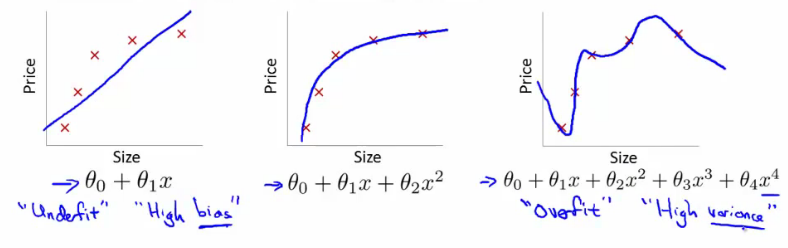

Bias, Variance

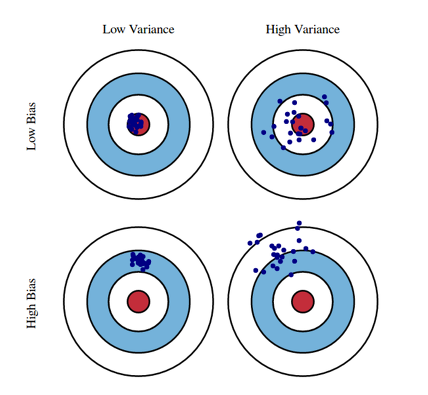

To recap, if we have too many features then the learned hypothesis may give a cost function of exactly zero

-But this tries too hard to fit the training set

-Fails to provide a general solution - unable to generalize (apply to new examples)

- Overfitting with logistic regression

Same thing can happen to logistic regression

- Sigmoidal function is an underfit

- But a high order polynomial gives and overfitting (high variance hypothesis)


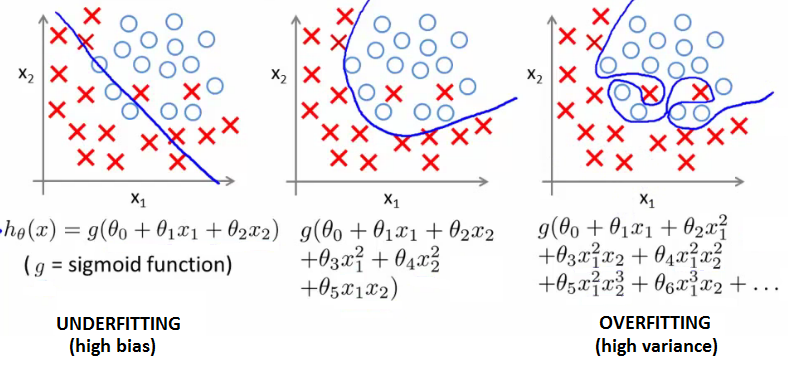

Addressing overfitting

Later we'll look at identifying when overfitting and underfitting is occurring

Earlier we just plotted a higher order function - saw that it looks "too curvy"

- Plotting hypothesis is one way to decide, but doesn't always work

- Often have lots of a features - here it's not just a case of selecting a degree polynomial, but also harder to plot the data and 
visualize to decide what features to keep and which to drop

- If you have lots of features and little data - overfitting can be a problem

How do we deal with this?

1) Reduce number of features

- Manually select which features to keep

- Model selection algorithms are discussed later (good for reducing number of features)

- But, in reducing the number of features we lose some information

- Ideally select those features which minimize data loss, but even so, some info is lost

2) Regularization

- Keep all features, but reduce magnitude of parameters θ

- Works well when we have a lot of features, each of which contributes a bit to predicting y


## Cost function optimization for regularization 

Penalize and make some of the θ parameters really small

- e.g. here θ3 and θ4

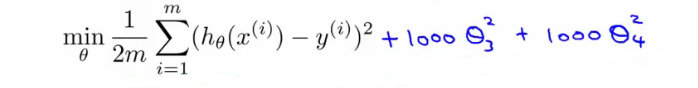

The addition in blue is a modification of our cost function to help penalize θ3 and θ4

- So here we end up with θ3 and θ4 being close to zero (because the constants are massive)

- So we're basically left with a quadratic function

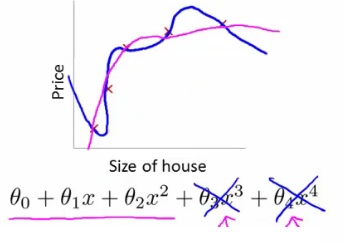

In this example, we penalized two of the parameter values

- More generally, regularization is as follows

Regularization

- Small values for parameters corresponds to a simpler hypothesis (you effectively get rid of some of the terms)

- A simpler hypothesis is less prone to overfitting

Another example

- Have 100 features x1, x2, ..., x100

- Unlike the polynomial example, we don't know what are the high order terms

- How do we pick the ones to pick to shrink?

- With regularization, take cost function and modify it to shrink all the parameters

- Add a term at the end

- This regularization term shrinks every parameter

- By convention you don't penalize θ0 - minimization is from θ1 onwards

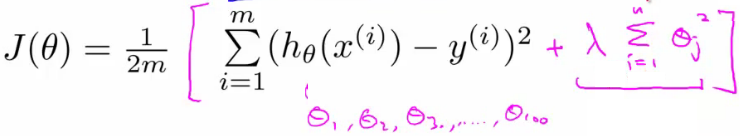

In practice, if you include θ0 has little impact

λ is the regularization parameter

- Controls a trade off between our two goals

1) Want to fit the training set well

2) Want to keep parameters small

With our example, using the regularized objective (i.e. the cost function with the regularization term) you get a much smoother curve which fits the data and gives a much better hypothesis

- If λ is very large we end up penalizing ALL the parameters (θ1, θ2 etc.) so all the parameters end up being close to zero

- If this happens, it's like we got rid of all the terms in the hypothesis

- This results here is then underfitting

- So this hypothesis is too biased because of the absence of any parameters (effectively)

So, λ should be chosen carefully - not too big...

- We look at some automatic ways to select λ later in the course

## Regularized linear regression

Previously, we looked at two algorithms for linear regression

- Gradient descent

- Normal equation

Our linear regression with regularization is shown below

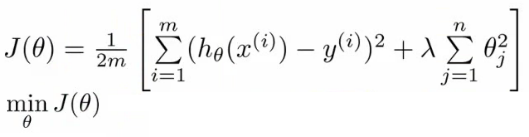

Previously, gradient descent would repeatedly update the parameters θj, where j = 0,1,2...n simultaneously

- Shown below

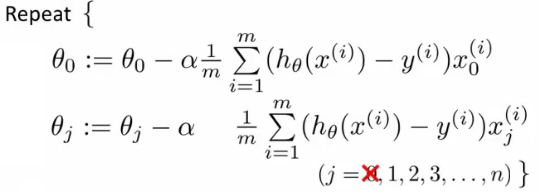

We've got the θ0 update here shown explicitly

- This is because for regularization we don't penalize θ0 so treat it slightly differently

How do we regularize these two rules?

- Take the term and add λ/m * θj

- Sum for every θ (i.e. j = 0 to n)

- This gives regularization for gradient descent

We can show using calculus that the equation given below is the partial derivative of the regularized J(θ)


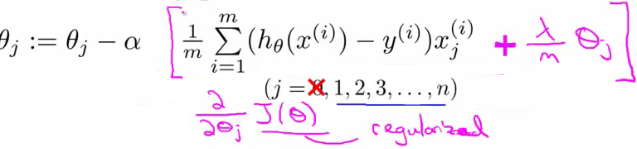

The update for θj 

- θj gets updated to 

- θj - α * [a big term which also depends on θj] 

So if you group the θj terms together

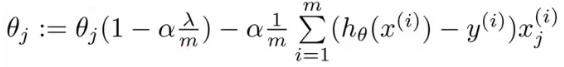

The term 

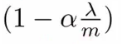

- Is going to be a number less than 1 usually

- Usually learning rate is small and m is large

- So this typically evaluates to (1 - a small number)

- So the term is often around 0.99 to 0.95

This in effect means θj gets multiplied by 0.99

- Means the squared norm of θj a little smaller

- The second term is exactly the same as the original gradient descent 

## Regularization with the normal equation

Normal equation is the other linear regression model

- Minimize the J(θ) using the normal equation

- To use regularization we add a term (+ λ [n+1 x n+1]) to the equation

- [n+1 x n+1] is the n+1 identity matrix 

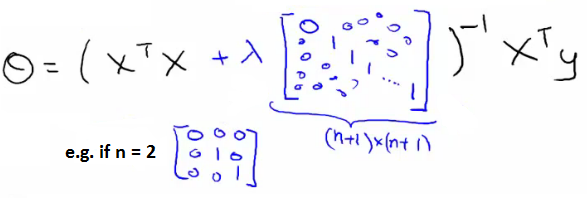

Regularization for logistic regression

We saw earlier that logistic regression can be prone to overfitting with lots of features 

Logistic regression cost function is as follows;

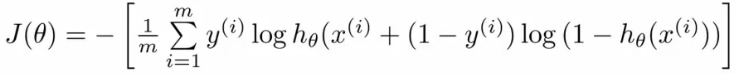

To modify it we have to add an extra term

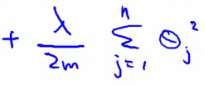

This has the effect of penalizing the parameters θ1, θ2 up to θn 

- Means, like with linear regression, we can get what appears to be a better fitting lower order hypothesis 

How do we implement this?

- Original logistic regression with gradient descent function was as follows

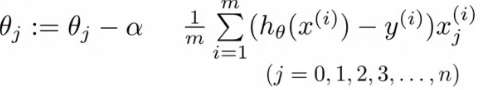

Again, to modify the algorithm we simply need to modify the update rule for θ1, onwards

- Looks cosmetically the same as linear regression, except obviously the hypothesis is very different

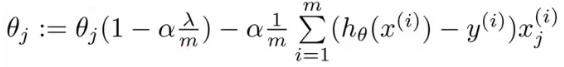

# Advanced optimization of regularized linear regression

As before, define a costFunction which takes a θ parameter and gives jVal and gradient back

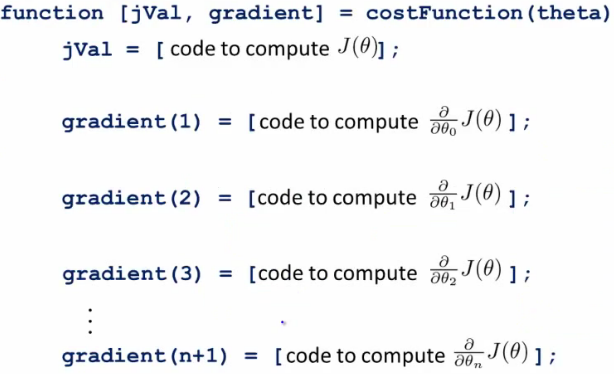

use fminunc

- Pass it an @costfunction argument

- Minimizes in an optimized manner using the cost function

jVal

- Need code to compute J(θ)

- Need to include regularization term

Gradient

- Needs to be the partial derivative of J(θ) with respect to θi

- Adding the appropriate term here is also necessary


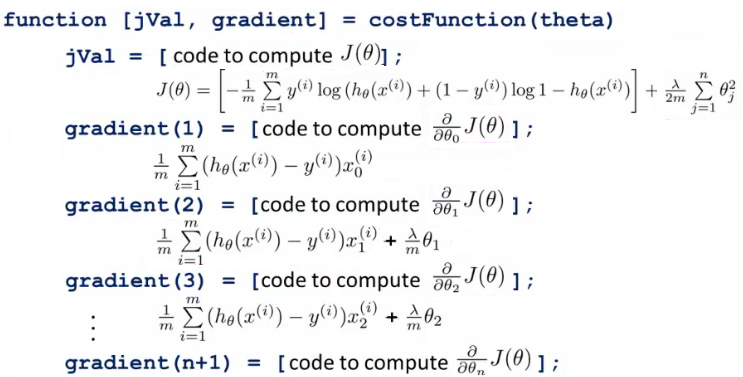

Ensure summation doesn't extend to to the lambda term! 

- It doesn't, but, you know, don't be daft!